In [95]:
import networkx as nx
from itertools import combinations
from random import shuffle

In [102]:
minsk_nx = nx.Graph()
toronto_nx = nx.Graph()
piter_nx = nx.Graph()


minsk_nx.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 8), (8, 23), (23, 24)])
toronto_nx.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36),  (36, 18), (18, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (44, 47), (47, 48), (31, 49), (49, 50), (50, 51), (51, 52), (50, 51), (51, 52), (52, 53), (53, 16), (16, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61)])
piter_nx.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 7), (7, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (35, 36), (36, 8), (8, 25), (25, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (43, 44), (44, 45), (45, 46), (46, 10), (10, 26), (26, 47), (47, 48),  (49, 50), (50, 51), (51, 52), (52, 46), (46, 53), (53, 9), (9, 26)])

### Minsk Underground Graph

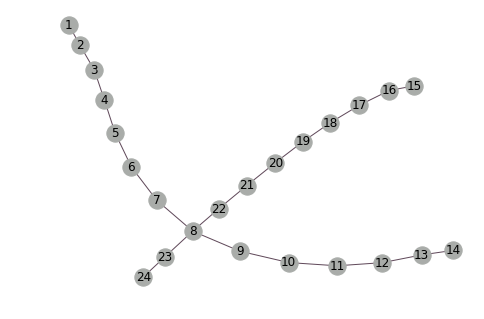

In [38]:
nx.draw(minsk_nx, pos=nx.spring_layout(minsk_nx), node_color='#A9ACA9', edge_color='#60495A', with_labels=True)

### Toronto Underground Graph

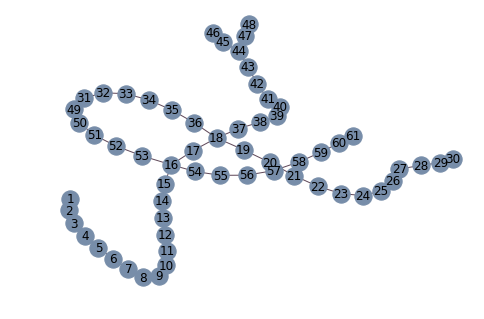

In [77]:
nx.draw(toronto_nx, pos=nx.spring_layout(toronto_nx), node_color='#778DA9',edge_color='#60495A', with_labels=True)

### Saint Petersburg Underground Graph

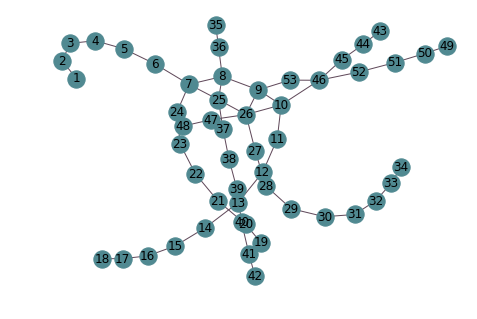

In [101]:
nx.draw(piter_nx, pos=nx.spring_layout(piter_nx), node_color='#508991',edge_color='#60495A', with_labels=True)

## Isomorphism check by VF2 algorithm

In [118]:
print('Nodes in Toronto: ', len(list(toronto_nx.nodes)))
print('Nodes in Saint Petersburg: ', len(list(piter_nx.nodes)))

Nodes in Toronto:  61
Nodes in Saint Petersburg:  53


In [119]:
# Is Saint Petesburg graph isomorphic to Toronto graph?
GM = nx.isomorphism.GraphMatcher(piter_nx, toronto_nx)
GM.is_isomorphic()

False

## Isomorphism check by another algorithm

_Note: i'm not the best student but i know how to use google._ 

![gif](https://media.giphy.com/media/o0vwzuFwCGAFO/giphy.gif)

In [121]:
# source: https://dxdy.ru/topic1502.html
# explanation: http://snilit.tspu.ru/uploads/files/default/combinatorial_algorithm.pdf page 396

class Node:
  def __init__(self, no):
    self.no = no
    self.color = None
    self.edges = []

  def connections(self):
    d = {}
    for e in self.edges:
      if e.color in d:
        d[e.color] += 1
      else:
        d[e.color] = 1
    dlist = d.items()
    dlist = sorted(dlist)
    return (self.color, tuple(dlist))

class Graph:
  def __init__(self, nodeCount):
    self.nodeCount = nodeCount
    self.nodes = [Node(ix) for ix in range(nodeCount)]
    self.edgeCount = 0

  def addEdge(self, a, b):
    self.nodes[a].edges.append(self.nodes[b])
    self.nodes[b].edges.append(self.nodes[a])
    self.edgeCount += 1

  def addEdges(self, edgeList):
    for a, b in edgeList:
      self.addEdge(a, b)

  def _createHistogram(self):
    d = {}
    for n in self.nodes:
      k = n.connections()
      if k in d:
        d[k].append(n)
      else:
        d[k] = [n]
    return d

  def _wipe(self, color):
    for n in self.nodes:
      n.color = color

  def is_somorphic(self, other):
    if self.nodeCount != other.nodeCount:
      return False
    if self.edgeCount != other.edgeCount:
      return False
    if self.nodeCount  <= 1:
      return True

    colors = 0
    colorCounters = {0: self.nodeCount}
    self._wipe(colors); other._wipe(colors)
    painted = True
    while painted:
      painted = False
      sHistogram = self._createHistogram(); oHistogram = other._createHistogram()
      for k in sHistogram:
        sNodes = sHistogram[k]; oNodes = oHistogram[k]
        if len(sNodes) != len(oNodes):
          return False
        if len(sNodes) != colorCounters[k[0]]:
          colors += 1
          colorCounters[colors] = len(sNodes)
          colorCounters[k[0]] -= len(sNodes)
          for n in sNodes:
            n.color = colors
          for n in oNodes:
            n.color = colors
          painted = True
    return True

In [122]:
toronto_selfmade_subgraph = Graph(54)
toronto_selfmade_subgraph.addEdges(list(toronto_nx.subgraph(list(toronto_nx.nodes)[:53]).edges))

piter_selfmade_graph = Graph(54)
piter_selfmade_graph.addEdges(list(piter_nx.edges))

toronto_selfmade_subgraph.is_somorphic(piter_selfmade_graph)

False

## Is there an isomorphic subgrpah in Saint Petesburg to Minsk?

In [138]:
GM_2 = nx.isomorphism.GraphMatcher(piter_nx, minsk_nx)
GM_2.subgraph_is_isomorphic()

True

In [139]:
subgraph_isomorphisms = []

for isomorfism in GM_2.subgraph_isomorphisms_iter():
    subgraph_isomorphisms.append(isomorfism)

In [140]:
len(subgraph_isomorphisms)

36

In [141]:
piter_isomorphic_subgraph = piter_nx.subgraph(subgraph_isomorphisms[0].keys())

### Subgraph in Saint Petesburg isomorphic to Minsk graph 

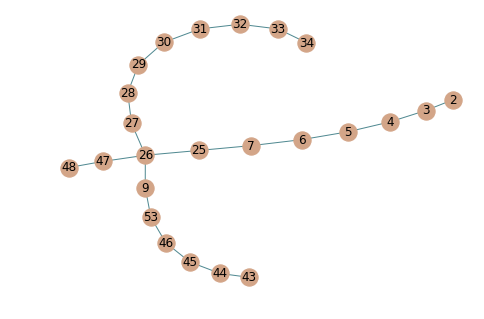

In [142]:
nx.draw(piter_isomorphic_subgraph, pos=nx.spring_layout(piter_isomorphic_subgraph), node_color='#D3A588',edge_color='#508991', with_labels=True)

### Minsk Underground Graph 

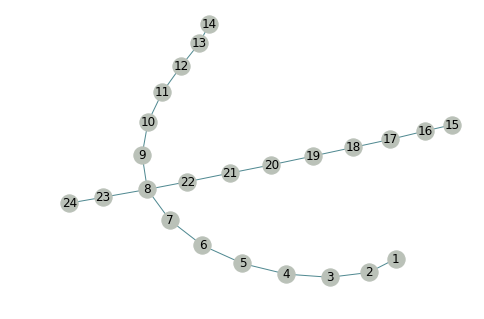

In [143]:
nx.draw(minsk_nx, pos=nx.spring_layout(minsk_nx), node_color='#BAC1B8',edge_color='#508991', with_labels=True)